This project's data consists of customers' spend at a business and some basic demographic data regarding each customer (age, income, and years of education). The project builds the best predictive model possible that can predict, based on these demographic factors, how much a given customer will spend at the business.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('/content/drive/MyDrive/Marketing-Analytics/Data/spend_age_income_ed.csv')
df.head()

,spend,age,income,years_of_education
0,3304.0,36.0,45125.0,12
1,3709.0,43.0,41695.0,10
2,3305.0,47.0,39253.0,17
3,2170.0,33.0,32384.0,13
4,2113.0,30.0,33182.0,10


**Correlation**

Correlation coefficients are a quantitative measure that describe the strength of association/relationship between two variables.

$cov(x, y) = \frac{1}{n-1} \Sigma (x_i-\overline{x})(y_i-\overline{y})$

$cor(x,y) = \frac{1}{n-1} \Sigma (\frac{x_i-\overline{x}}{s_x})(\frac{y_i-\overline{y})}{s_y})$

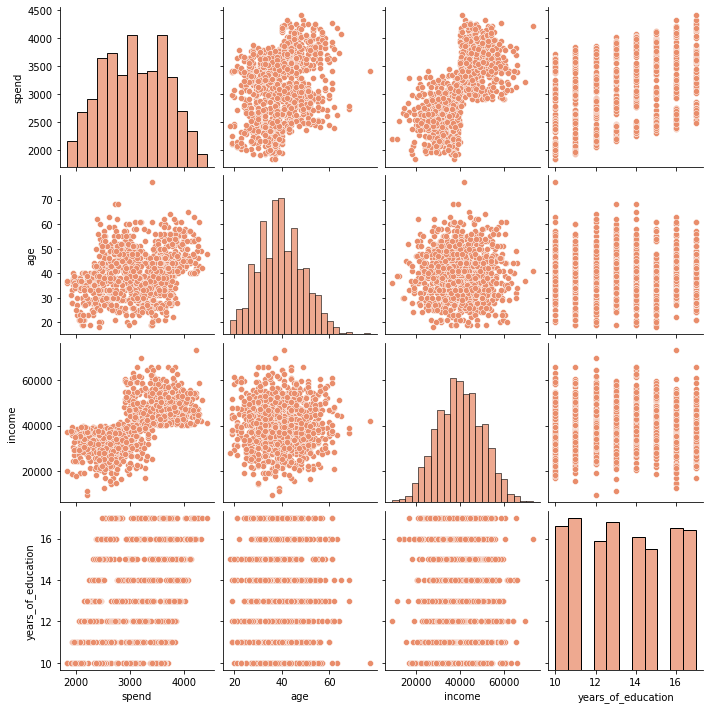

In [ ]:
# Pair plot

sns.set_palette('flare')
sns.pairplot(df)
plt.show()

In [ ]:
df.corr()

,spend,age,income,years_of_education
spend,1.000000,0.314806,0.665975,0.324947
age,0.314806,1.000000,-0.002570,-0.031474
income,0.665975,-0.002570,1.000000,-0.036213
years_of_education,0.324947,-0.031474,-0.036213,1.000000


In [ ]:
X = df[['age','income','years_of_education']]
y = df['spend']

In [ ]:
from sklearn.model_selection import train_test_split
 
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 22)

**Linear Regression**

* simple linear regression model: $y_i = B_0 + B_ix_i + ϵ_i$
* $y_i$ - response variable
* $x_i$ - predictor variable or regressor
* $B_0$ - intercept
* $B_i$ - slope of $x_i$
* $ϵ_i$ - residual ($y_i - \hat y$)

Least-squares estimators
 * $\hat B_1 = \frac{\Sigma(x_i - \overline x)(y_i - \overline y)}{\Sigma(x_i - \overline x)^2}$
 * $\hat B_0 = \overline y - \hat B_1 \overline x$
 * $\sigma^2 = \frac{1}{n-2} \Sigma[y_i - (\hat B_0 + \hat B_1 x_i)]^2$

Prediction line: $\hat y = \hat B_0 + \hat B_1$

Coefficient of determination: $R^2 = \frac{\Sigma(\hat y - \overline y)^2}{(y_i - \overline y)^2}$
* $R^2$ ranges from 0 to 1 and is good (stronger) when closer to 1. This metric measures the percentage of variation explained by the regression line. 

In [ ]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

**Decision Tree**

The Decision tree algorithm gets their name from the inverted tree-like structures they follow. In a normal tree, the bottom part is the root, and the topmost part is the leaf of the tree. Since a decision tree follows the reverse structure, the topmost node is referred to as the root node. A node, in simple terms, is the smallest block in the decision tree. Every node has a certain rule that decides where to go next (which branch to follow). The last nodes or the terminal nodes of the decision tree are called leaves. This is where the target variable prediction happens. When a new input is provided for prediction, it first goes to the root node and then moves down to the leaf node for prediction.

Decision trees use multiple algorithms to split at the root node or sub-node. A decision tree goes through all of the features and picks the feature on which it can get the most homogeneous sub-nodes. For classification tasks, it decides the most homogeneous sub-nodes based on the information gained.

Information gain gives details on how much "information" a feature will hold about the class. Features that are perfectly separable or partitioned will give maximum information, while features that are not perfectly separable or partitioned will give us less information: $ IG(D_p,f) = I(D_p)-\frac{N_{left}}{N_p}I(D_{left}) - \frac{N_{right}}{N_p}I(D_{right})    $
 *  $IG$ = information gain 
 * $I$ = impurity 
 * $f$ = feature 
 * $D_p$ = parent dataset
 * $D_{left}$ = left child dataset 
 * $D_{right}$ = right child dataset
 * $N_p$ = total number of samples in the parent dataset 
 * $N_{left}$ = number of samples in the left child dataset
 * $N_{right}$ = number of samples in the right child dataset.

Gini impurity is a measure of misclassification, which applies in a multi-class classifier context. The Gini index can be defined as the criterion that would minimize the probability of misclassification: $ I_g(t) = \sum_{i=1}^k p(i|t)(1-p(i|t)) = 1 - \sum_{i=1}^k p(i|t)^2 $
 * $k$ = number of classes
 * $p(i│t)$ = proportion of samples that belong to class k for a particular node t.

In [ ]:
from sklearn.tree import DecisionTreeRegressor

max2_tree_model = DecisionTreeRegressor(max_depth=2)
max2_tree_model.fit(X_train,y_train)

max5_tree_model = DecisionTreeRegressor(max_depth=5)
max5_tree_model.fit(X_train,y_train)

DecisionTreeRegressor(max_depth=5)

**Random Forest**

The  random forest  algorithm reduces variance/overfitting by averaging multiple decision trees, which individually suffer from high variance.

Random Forest Algorithm:
1. A random bootstrap sample (a sample drawn with replacement) of size m is chosen from the training data. This splits the training data into subsets such as Data1, Data2, and so on. 
2. Decision trees are grown on each instance of the bootstrap. These decision trees can be referred to as Learner1, Learner2, and so on. 
3. d features are chosen randomly without replacement. 
4. Each node is split using the d features selected based on objective functions, which could be information gain. 
5. Steps 1-4 are repeated k times. Eventually, this generates Model1, Model2, and so on for each subset.
6. All of the predictions from the multiple trees are aggregated and assigned a class label by majority vote.

The thumb rule for variable selection of m variables out of total variables p, is m = sqrt(p) for classification and m = p/3 for regression problems randomly to avoid correlation among the individual trees. By doing so, significant improvement in accuracies can be achieved.

In [ ]:
from sklearn.ensemble import RandomForestRegressor
 
max2_forest_model = RandomForestRegressor(max_depth=2, random_state=22)
max2_forest_model.fit(X_train,y_train)
 
max5_forest_model = RandomForestRegressor(max_depth=5, random_state=22)
max5_forest_model.fit(X_train,y_train)

RandomForestRegressor(max_depth=5, random_state=22)

In [ ]:
from sklearn.metrics import mean_squared_error
 
linear_predictions = model.predict(X_test)
print('Linear model RMSE: ' + str(mean_squared_error(linear_predictions, y_test)**0.5))
 
max2_tree_predictions = max2_tree_model.predict(X_test)
print('Tree with max depth of 2 RMSE: ' + str(mean_squared_error(max2_tree_predictions, y_test)**0.5))
 
max5_tree_predictions = max5_tree_model.predict(X_test)
print('Tree with max depth of 5 RMSE: ' + str(mean_squared_error(max5_tree_predictions, y_test)**0.5))
 
max2_forest_predictions = max2_forest_model.predict(X_test)
print('Random Forest with max depth of 2 RMSE: ' + str(mean_squared_error(max2_forest_predictions, y_test)**0.5))
 
max5_forest_predictions = max5_forest_model.predict(X_test)
print('Random Forest with max depth of 5 RMSE: ' + str(mean_squared_error(max5_forest_predictions, y_test)**0.5))

Linear model RMSE: 344.83276983454437
Tree with max depth of 2 RMSE: 265.5199447343235
Tree with max depth of 5 RMSE: 133.25545160302534
Random Forest with max depth of 2 RMSE: 263.8083687229997
Random Forest with max depth of 5 RMSE: 121.0197631017003


The random forest model with mad depth of 5 is the best predictive model for this data. 